<a href="https://colab.research.google.com/github/Abhilash-Bee/DeepLearningCertification/blob/main/01_Neural_network_regression_with_TensorFlow_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🛠 01. Neural network regression with TensorFlow Exercises**

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
 * Building a larger model (how does one with 4 dense layers go?).
 * Increasing the number of units in each layer.
Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
 * What happens if you train for longer (say 300 epochs instead of 200)?

4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

---

---

## **0. Importing TensorFlow**

In [ ]:
import tensorflow as tf

tf.__version__

'2.15.0'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

---

## **1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.**


In [ ]:
X = tf.range(-50, 500, 8).numpy()
y = tf.range(-40, 506, 8).numpy()
df = pd.DataFrame({'X': X, 'y': y})
df

,X,y
0,-50,-40
1,-42,-32
2,-34,-24
3,-26,-16
4,-18,-8
...,...,...
64,462,472
65,470,480
66,478,488
67,486,496


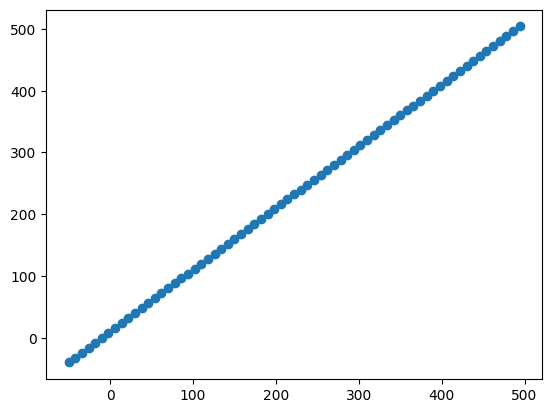

In [ ]:
plt.scatter(X, y);

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((55,), (55,), (14,), (14,))

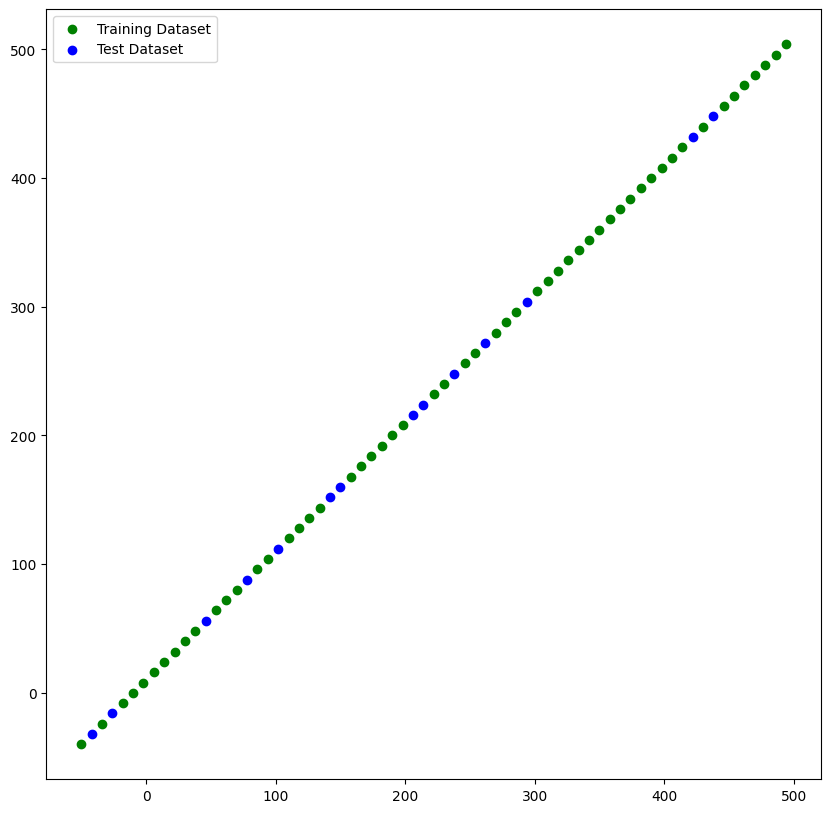

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, c='g', label='Training Dataset')
plt.scatter(X_test, y_test, c='b', label='Test Dataset')
plt.legend();

In [ ]:
def plot_scatter(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, prediction=None):
  plt.figure(figsize=(10, 10))
  plt.scatter(X_train, y_train, c='g', label='Training Dataset')
  plt.scatter(X_test, y_test, c='b', label='Test Dataset')
  plt.scatter(X_test, prediction, c='r', label='Prediction Dataset')
  plt.legend()

### **Model - 1 Prediction** - 1 Dense layer [1] - SGD

In [ ]:
tf.random.set_seed(8)

# 1. Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 126ms/step - loss: 436.5715 - mae: 436.5715


[436.57147216796875, 436.57147216796875]

In [ ]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 79ms/step


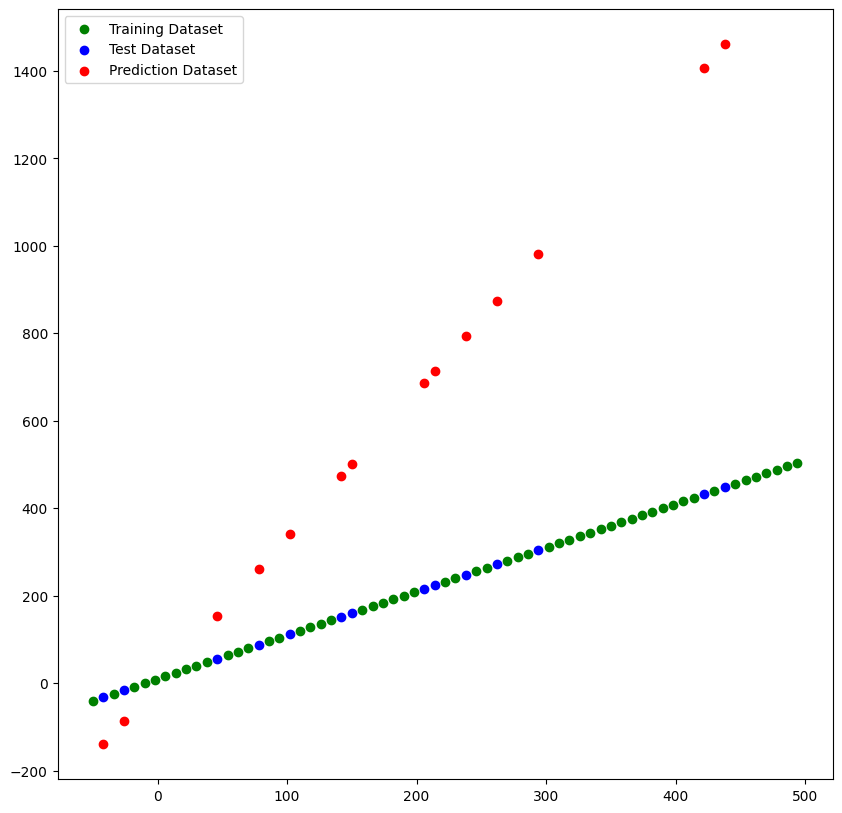

In [ ]:
plot_scatter(prediction=y_pred_1)

### **Model - 2 Prediction** - 2 Dense layers [100, 1] - SGD

In [ ]:
tf.random.set_seed(8)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.mae,
                metrics=['mae'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 143ms/step - loss: nan - mae: nan


[nan, nan]

### **Model - 3 Prediction** - 2 Dense layers [100, 1] - Adam

In [ ]:
tf.random.set_seed(8)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 128ms/step - loss: 4.6733 - mae: 4.6733


[4.673266410827637, 4.673266410827637]

In [ ]:
y_pred_2 = model_3.predict(X_test)

1/1 [==============================] - 0s 126ms/step


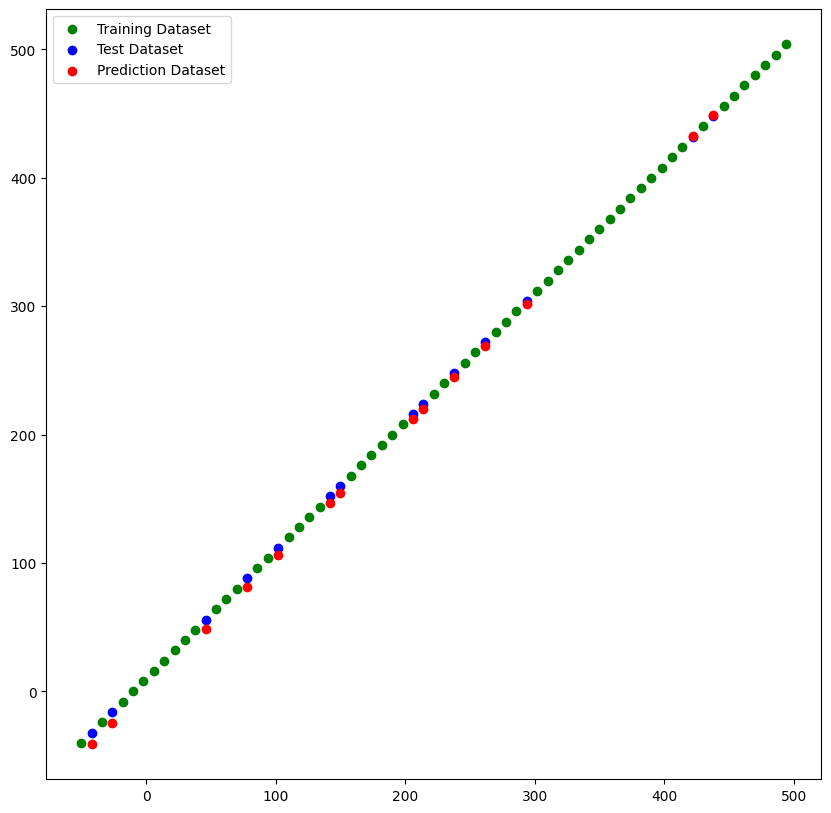

In [ ]:
plot_scatter(prediction=y_pred_2)

### **Model - 4 Prediction** - 2 Dense layers [680, 1] - Adam - epochs = 200

In [ ]:
tf.random.set_seed(8)

# 1. Create the model
model_4 = tf.keras.Sequential([
    # tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(680),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=['mae'])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [ ]:
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 129ms/step - loss: 1.5315 - mae: 1.5315


[1.5314816236495972, 1.5314816236495972]

In [ ]:
y_preds_3 = model_4.predict(X_test)

1/1 [==============================] - 0s 61ms/step


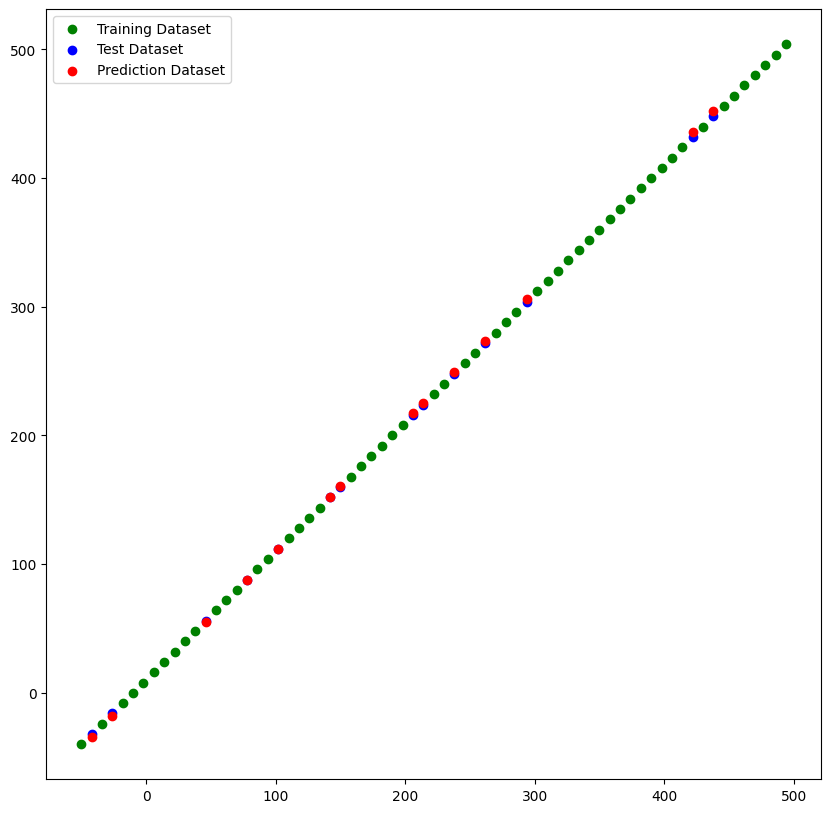

In [ ]:
plot_scatter(prediction=y_preds_3)

### **Model - 5 Prediction** - 2 Dense layers [680, 1] - Adam - epochs = 200

In [ ]:
tf.random.set_seed(8)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(680),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.mae,
                metrics=['mae'])

# 3. Fit the model
model_5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [ ]:
model_5.evaluate(X_test, y_test)

1/1 [==============================] - 0s 139ms/step - loss: 0.3760 - mae: 0.3760


[0.37598949670791626, 0.37598949670791626]

In [ ]:
y_pred_4 = model_5.predict(X_test)

1/1 [==============================] - 0s 51ms/step


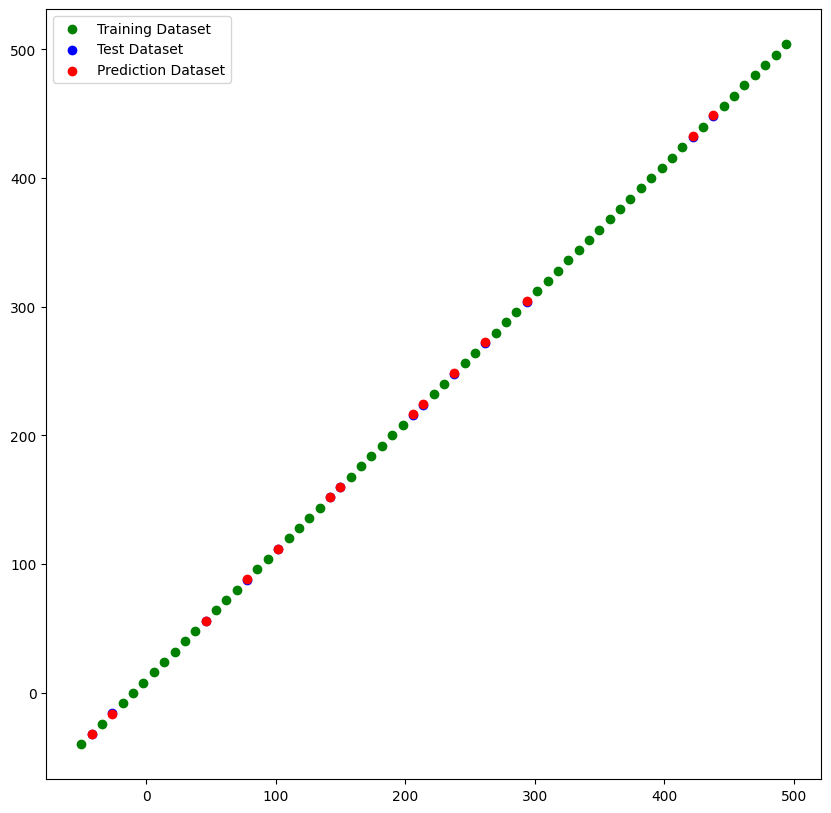

In [ ]:
plot_scatter(prediction=y_pred_4)

In [ ]:
!mkdir /content/drive/MyDrive/Colab\ Notebooks/DeepLearning/BestModel

In [ ]:
model_5.save('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Basic_regression.keras')

In [ ]:
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Basic_regression.keras')

In [ ]:
saved_model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 959ms/step - loss: 0.3760 - mae: 0.3760


[0.37598949670791626, 0.37598949670791626]

In [ ]:
y_saved_preds = saved_model.predict(X_test)

1/1 [==============================] - 0s 75ms/step


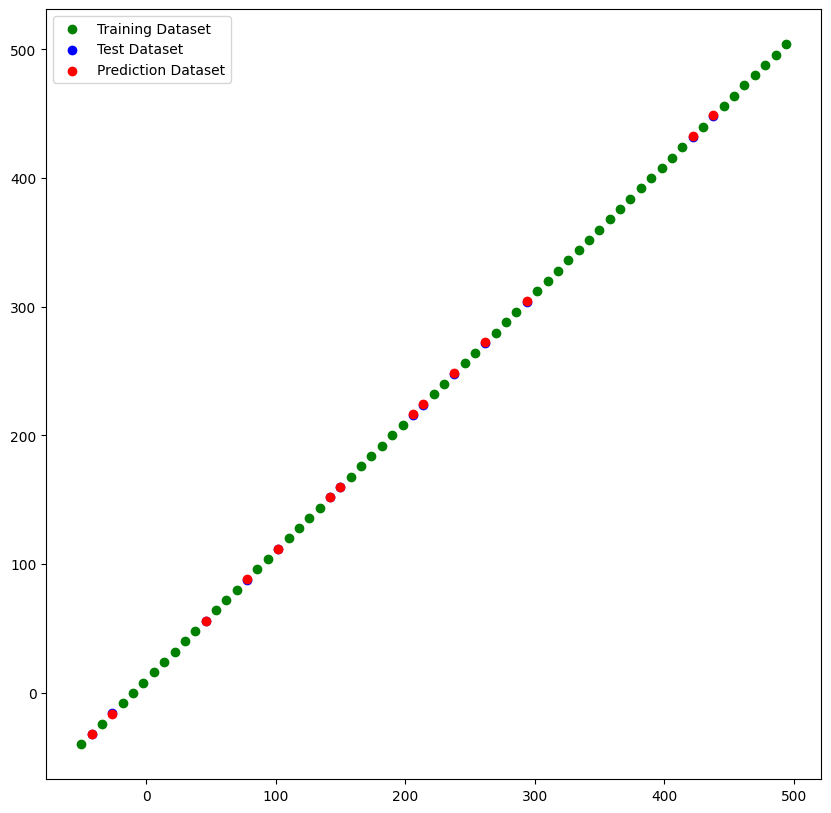

In [ ]:
plot_scatter(prediction=y_saved_preds)

In [ ]:
saved_model.predict([[500]])

1/1 [==============================] - 0s 297ms/step


array([[511.08704]], dtype=float32)

In [ ]:
saved_model.predict([[510]])

1/1 [==============================] - 0s 45ms/step


array([[521.1112]], dtype=float32)

In [ ]:
saved_model.predict([[0]])

1/1 [==============================] - 0s 56ms/step


array([[9.887999]], dtype=float32)

---

---

## **2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?**

In [ ]:
tf.random.set_seed(8)

# 1. Create the model
model_4_Dense = tf.keras.Sequential([
    tf.keras.layers.Dense(70),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(70),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4_Dense.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                      loss = tf.keras.losses.mae,
                      metrics=['mae'])

In [ ]:
# 3. Fit the model
model_4_Dense.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
model_4_Dense.evaluate(X_test, y_test)

1/1 [==============================] - 0s 32ms/step - loss: 1.3539 - mae: 1.3539


[1.353934407234192, 1.353934407234192]

In [ ]:
y_preds_4_Dense = model_4_Dense.predict(X_test)

1/1 [==============================] - 0s 169ms/step


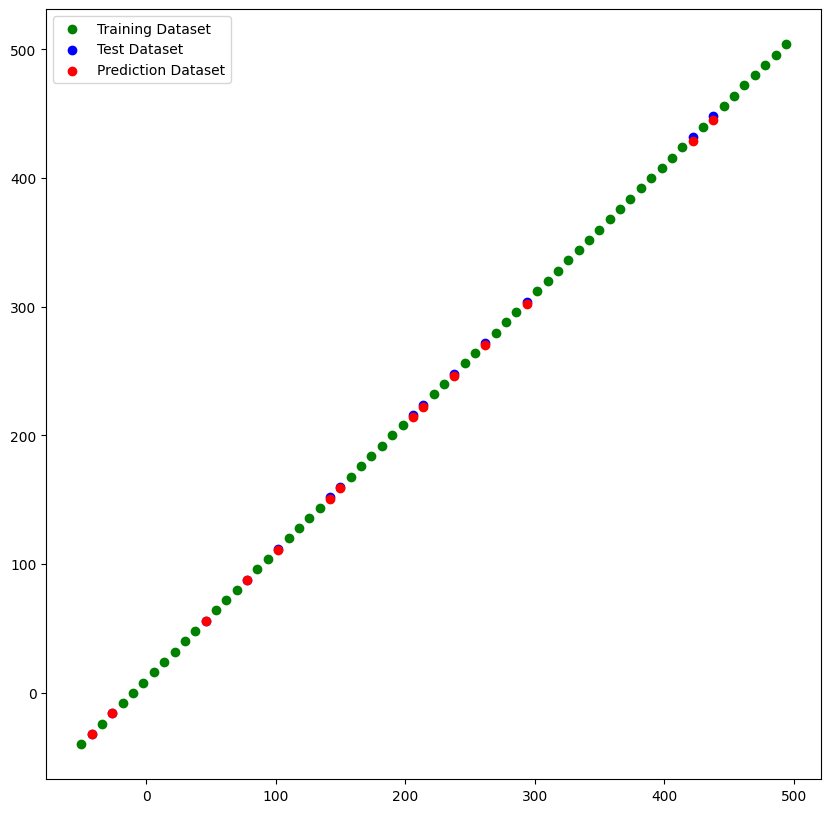

In [ ]:
plot_scatter(prediction=y_preds_4_Dense)

In [ ]:
model_4_Dense.save('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Simple_regression_dense_4.keras')

In [ ]:
saved_dense_4_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Simple_regression_dense_4.keras')

In [ ]:
saved_dense_4_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 241ms/step - loss: 1.3539 - mae: 1.3539


[1.353934407234192, 1.353934407234192]

In [ ]:
y_dense_4_pred = saved_dense_4_model.predict(X_test)

1/1 [==============================] - 0s 261ms/step


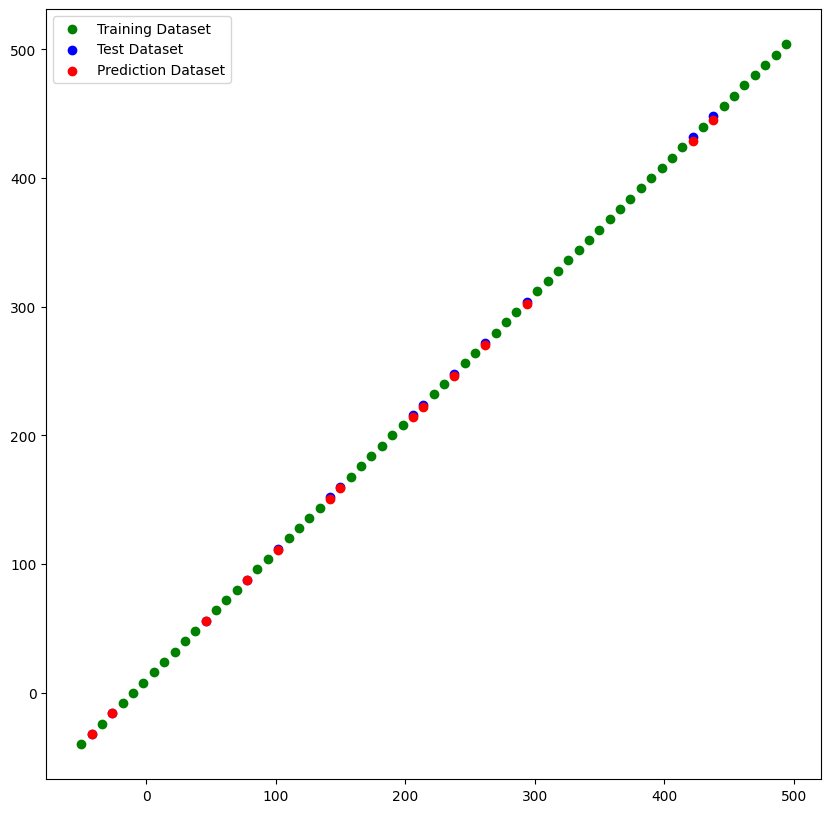

In [ ]:
plot_scatter(prediction=y_dense_4_pred)

---

---

## **3. Try and improve the results we got on the insurance dataset, some things you might want to try include:**
 * Building a larger model (how does one with 4 dense italicized textlayers go?).

 * Increasing the number of units in each layer.
Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?

 * What happens if you train for longer (say 300 epochs instead of 200)?

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Data Preprocessing**

In [ ]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

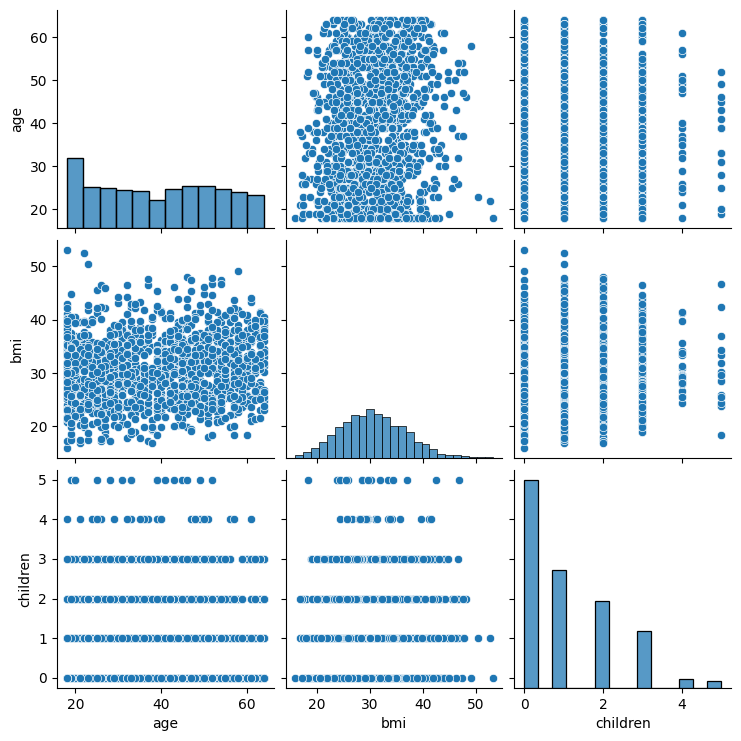

In [ ]:
sns.pairplot(X)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
X.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [ ]:
len(X)

1338

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
transformer = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(), ['sex', 'smoker', 'region'])
)

transformer.fit(X_train)

X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)

In [ ]:
X_train_scaled[0]

array([0.23913043, 0.37812318, 0.2       , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [ ]:
X_test_scaled[0]

array([0.02173913, 0.19320163, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

### **Preparing Model - 1**

In [ ]:
tf.random.set_seed(8)

# 1. Create the model
ins_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
ins_model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss = tf.keras.losses.mae,
                    metrics=['mae'])

# 3. Fit the model
ins_model_1.fit(X_train_scaled, y_train, epochs=100, verbose=0)

In [ ]:
ins_model_1.evaluate(X_test_scaled, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8192.3408 - mae: 8192.3408


[8192.3408203125, 8192.3408203125]

### **Preparing Model - 2**

In [ ]:
tf.random.set_seed(8)

# 1. Creating the model
ins_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
ins_model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss=tf.keras.losses.mae,
                    metrics=['mae'])

# 3. Fit the model
ins_model_2.fit(X_train_scaled, y_train, epochs=200, verbose=0)

In [ ]:
ins_model_2.evaluate(X_test_scaled, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4050.4570 - mae: 4050.4570


[4050.45703125, 4050.45703125]

### **Preparing Model - 3**

In [ ]:
tf.random.set_seed(8)

# 1. Create the model
ins_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
ins_model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss=tf.keras.losses.mae,
                    metrics=['mae'])

# 3. Fit the model
ins_model_3.fit(X_train_scaled, y_train, epochs=200, verbose=0)

In [ ]:
ins_model_3.evaluate(X_test_scaled, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4042.3894 - mae: 4042.3894


[4042.389404296875, 4042.389404296875]

### **Improvising the model now**

In [ ]:
tf.random.set_seed(8)

# 1. Creating the model
final_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    loss=tf.keras.losses.mae,
                    metrics=['mae'])

# 3. Fit the model
final_model.fit(X_train_scaled, y_train, epochs=400, verbose=0)

In [ ]:
final_model.evaluate(X_test_scaled, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1586.8879 - mae: 1586.8879


[1586.887939453125, 1586.887939453125]

---

---

## **4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data()

### **Data Preprocessing**

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale = MinMaxScaler()
scale.fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
X_train[0]

array([0.01378163, 0.        , 0.28152493, 0.        , 0.31481481,
       0.49980635, 0.91452111, 0.29719123, 0.13043478, 0.22753346,
       0.89361702, 1.        , 0.46881898])

In [ ]:
y_train[0]

15.2

### **Preparing Model - 1**

In [ ]:
tf.random.set_seed(8)

# 1. Creating the model
bos_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
bos_model_1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                    loss=tf.keras.losses.mae,
                    metrics=['mae'])

# 3. Fit the model
bos_model_1.fit(X_train, y_train, epochs=300, verbose=0)

In [ ]:
bos_model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 2.4224 - mae: 2.4224


[2.4223711490631104, 2.4223711490631104]

---

---


📖 01. Neural network regression with TensorFlow Extra-curriculum

* [MIT introduction deep learning](https://www.youtube.com/watch?v=7sB052Pz0sQ&ab_channel=AlexanderAmini) lecture 1 - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.
* To practice your regression modelling with TensorFlow, I'd also encourage you to look through [Kaggle's datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model.